# 1.load split data

In [1]:
import joblib
# Load the split datasets from disk using joblib
X_train = joblib.load(r'1536_split/X_train.pkl')
X_val = joblib.load(r'1536_split/X_val.pkl')
X_test = joblib.load(r'1536_split/X_test.pkl')
y_train = joblib.load(r'1536_split/y_train.pkl')
y_val = joblib.load(r'1536_split/y_val.pkl')
y_test = joblib.load(r'1536_split/y_test.pkl')

In [2]:
X_train.shape
print(f'x_train shape: {X_train.shape}')
print(f'x_val shape: {X_val.shape}')
print(f'x_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (6600, 75, 1536)
x_val shape: (1485, 75, 1536)
x_test shape: (166, 75, 1536)
y_train shape: (6600, 3)
y_val shape: (1485, 3)
y_test shape: (166, 3)


# 2. Metrics 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
# Load model
from tensorflow.keras.models import load_model
model_lstm = load_model(r'face_pose_model\lstm_both_tanh.h5', compile=False)
model_gru = load_model(r'face_pose_model\gru_both_tanh.h5', compile=False)

In [3]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 75, 64)            409856    
                                                                 
 dropout (Dropout)           (None, 75, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 75, 128)           98816     
                                                                 
 dropout_1 (Dropout)         (None, 75, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 75, 64)            49408     
                                                                 
 dropout_2 (Dropout)         (None, 75, 64)            0         
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0

In [4]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 75, 64)            307584    
                                                                 
 dropout (Dropout)           (None, 75, 64)            0         
                                                                 
 gru_1 (GRU)                 (None, 75, 128)           74496     
                                                                 
 dropout_1 (Dropout)         (None, 75, 128)           0         
                                                                 
 gru_2 (GRU)                 (None, 75, 64)            37248     
                                                                 
 dropout_2 (Dropout)         (None, 75, 64)            0         
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0

In [7]:
yhat_lstm = model_lstm.predict(X_test)
ytrue_lstm = np.argmax(y_test, axis=1).tolist()
yhat_lstm = np.argmax(yhat_lstm, axis=1).tolist()
yhat_gru = model_gru.predict(X_test)
ytrue_gru = np.argmax(y_test, axis=1).tolist()
yhat_gru = np.argmax(yhat_gru, axis=1).tolist()
class_labels = ['alert', 'neutral', 'drowsy']

6/6 [==============================] - 1s 9ms/step


## LSTM EVALUATION

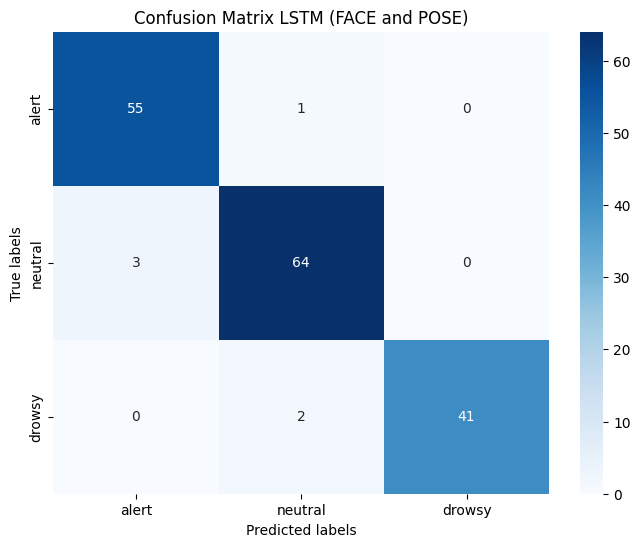

In [7]:
# Assuming ytrue and yhat are your true labels and predicted labels respectively
conf_matrix = confusion_matrix(ytrue_lstm, yhat_lstm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix LSTM (FACE and POSE)')
plt.show()

In [9]:
print(conf_matrix)

[[55  1  0]
 [ 3 64  0]
 [ 0  2 41]]


### LSTM (FACE and POSE)
fill

In [14]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(ytrue_lstm, yhat_lstm)
precision = precision_score(ytrue_lstm, yhat_lstm, average='weighted')
recall = recall_score(ytrue_lstm, yhat_lstm, average='weighted')
f1 = f1_score(ytrue_lstm, yhat_lstm, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.963855421686747
Precision: 0.9644786040714582
Recall: 0.963855421686747
F1 Score: 0.963923362623426


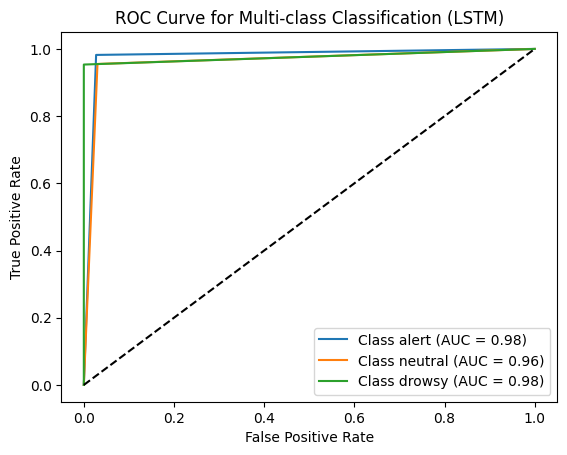

In [11]:
# Calculate ROC Curve and AUC
n_classes = len(class_labels)
if n_classes > 2:
    # For multi-class, calculate one-vs-rest ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((np.array(ytrue_lstm) == i).astype(int), (np.array(yhat_lstm) == i).astype(int))
        roc_auc[i] = roc_auc_score((np.array(ytrue_lstm) == i).astype(int), (np.array(yhat_lstm) == i).astype(int))

    # Plot ROC curve
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multi-class Classification (LSTM)')
    plt.legend(loc="lower right")
    plt.show()

else:
    # For binary classification, calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(ytrue_lstm, yhat_lstm)
    roc_auc = roc_auc_score(ytrue_lstm, yhat_lstm)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Binary Classification (LSTM)')
    plt.legend(loc="lower right")
    plt.show()

In [12]:
print(roc_auc)

{0: 0.9774350649350649, 1: 0.9624604251469925, 2: 0.9767441860465116}


## GRU EVALUATION 

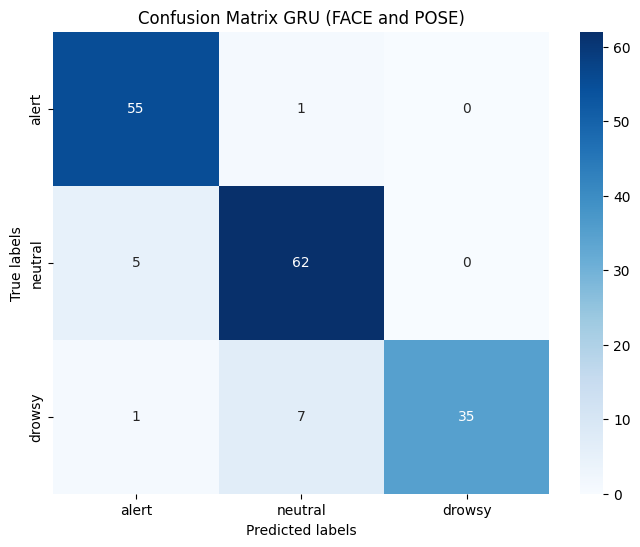

In [8]:
# Assuming ytrue and yhat are your true labels and predicted labels respectively
conf_matrix = confusion_matrix(ytrue_gru, yhat_gru)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix GRU (FACE and POSE)')
plt.show()

In [9]:
print(conf_matrix)

[[55  1  0]
 [ 5 62  0]
 [ 1  7 35]]


### GRU (FACE and POSE)
fill

In [16]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(ytrue_gru, yhat_gru)
precision = precision_score(ytrue_gru, yhat_gru, average='weighted')
recall = recall_score(ytrue_gru, yhat_gru, average='weighted')
f1_score = f1_score(ytrue_gru, yhat_gru, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'f1_score: {f1_score}')

Accuracy: 0.9156626506024096
Precision: 0.920690725430998
Recall: 0.9156626506024096
f1_score: 0.9149497108779494


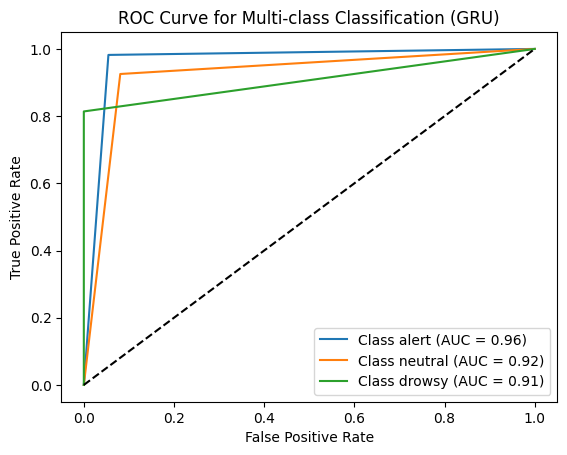

In [11]:
# Calculate ROC Curve and AUC
n_classes = len(class_labels)
if n_classes > 2:
    # For multi-class, calculate one-vs-rest ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((np.array(ytrue_gru) == i).astype(int), (np.array(yhat_gru) == i).astype(int))
        roc_auc[i] = roc_auc_score((np.array(ytrue_gru) == i).astype(int), (np.array(yhat_gru) == i).astype(int))

    # Plot ROC curve
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multi-class Classification (GRU)')
    plt.legend(loc="lower right")
    plt.show()

else:
    # For binary classification, calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(ytrue_gru, yhat_gru)
    roc_auc = roc_auc_score(ytrue_gru, yhat_gru)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Binary Classification (GRU)')
    plt.legend(loc="lower right")
    plt.show()

In [12]:
print(roc_auc)

{0: 0.9637987012987014, 1: 0.9222825267601388, 2: 0.9069767441860466}
